# Simulación de un Rectangulo con Punto en 2D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Escena:
    def __init__(self, ancho, alto, color_fondo, punto, color_punto):
        """Inicializa la escena con un rectángulo y un punto superpuesto."""
        self.ancho = ancho
        self.alto = alto
        self.color_fondo = color_fondo
        self.punto = np.array(punto, dtype=float)
        self.color_punto = color_punto

    def cambiar_escena(self, ancho, alto, color_fondo, punto, color_punto):
        """Permite cambiar los parámetros de la escena."""
        self.ancho = ancho
        self.alto = alto
        self.color_fondo = color_fondo
        self.punto = np.array(punto, dtype=float)
        self.color_punto = color_punto

    def dibujar_escena(self):
        """Dibuja la escena con el rectángulo y el punto."""
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.ancho)
        ax.set_ylim(0, self.alto)
        ax.set_aspect('equal')
        ax.set_facecolor(self.color_fondo)

        # Dibujar rectángulo
        rect = plt.Rectangle((0, 0), self.ancho, self.alto, color=self.color_fondo)
        ax.add_patch(rect)

        # Dibujar punto
        ax.plot(self.punto[0], self.punto[1], 'o', color=self.color_punto, markersize=10)

        plt.show()

    def desplazar_punto(self, x, direccion):
        """Desplaza el punto en una dirección dada por un valor x."""
        movimientos = {
            'derecha': np.array([x, 0]),
            'izquierda': np.array([-x, 0]),
            'arriba': np.array([0, x]),
            'abajo': np.array([0, -x])
        }

        if direccion in movimientos:
            self.punto += movimientos[direccion]
        else:
            raise ValueError("Dirección no válida. Use: 'derecha', 'izquierda', 'arriba' o 'abajo'.")

    def simular(self, velocidad, direccion, pasos=10):
        """Genera una animación del desplazamiento del punto."""
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.ancho)
        ax.set_ylim(0, self.alto)
        ax.set_aspect('equal')
        ax.set_facecolor(self.color_fondo)

        rect = plt.Rectangle((0, 0), self.ancho, self.alto, color=self.color_fondo)
        ax.add_patch(rect)
        punto_plot, = ax.plot([], [], 'o', color=self.color_punto, markersize=10)

        movimientos = {
            'derecha': np.array([velocidad, 0]),
            'izquierda': np.array([-velocidad, 0]),
            'arriba': np.array([0, velocidad]),
            'abajo': np.array([0, -velocidad])
        }

        if direccion not in movimientos:
            raise ValueError("Dirección no válida. Use: 'derecha', 'izquierda', 'arriba' o 'abajo'.")

        def actualizar(frame):
            self.punto += movimientos[direccion]
            punto_plot.set_data([self.punto[0]], [self.punto[1]])
            return punto_plot,

        ani = animation.FuncAnimation(fig, actualizar, frames=pasos, interval=100, blit=True)
        plt.show()




# Simulación de la Escena y Resultados

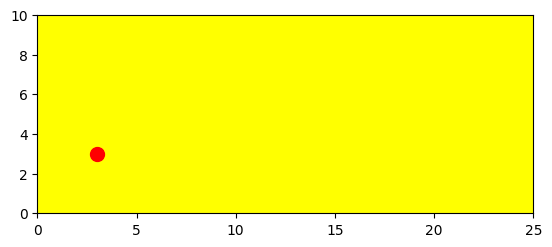

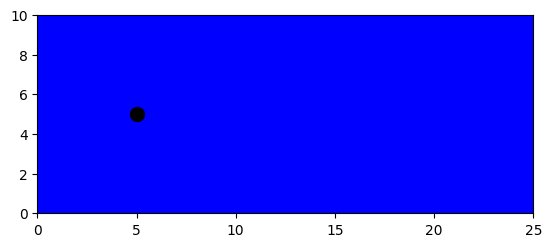

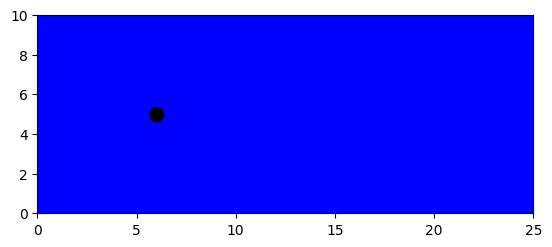

In [4]:
# Uso
escena = Escena(ancho=25, alto=10, color_fondo='yellow', punto=[3, 3], color_punto='red')
escena.dibujar_escena()
escena = Escena(ancho=25, alto=10, color_fondo='blue', punto=[5, 5], color_punto='black')
escena.dibujar_escena()
escena.simular(velocidad=0.5, direccion='derecha', pasos=20)